# ML model: logistic regression

In [12]:
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('year_2019_full_data.csv')

In [8]:
df

,rank,artist,title,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,success
0,1,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,2YpeDb67231RjR0MgVLzsG,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041,audio_features,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4,1.0
1,2,Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse),3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4,1.0
2,3,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,6,-7.050,1,0.0705,0.2970,0.000009,0.0936,0.533,136.041,audio_features,spotify:track:5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,4,1.0
3,4,Billie Eilish,Bad Guy,2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.130000,0.1000,0.562,135.128,audio_features,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,1.0
4,5,Post Malone,Wow.,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,11,-7.359,0,0.2080,0.1360,0.000002,0.1030,0.388,99.960,audio_features,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Chase Rice,Eyes On You,5AnSllIrgGsCZzZJkVnApx,0.606,0.652,9,-6.982,1,0.0281,0.3230,0.000000,0.2010,0.476,97.155,audio_features,spotify:track:5AnSllIrgGsCZzZJkVnApx,https://api.spotify.com/v1/tracks/5AnSllIrgGsC...,https://api.spotify.com/v1/audio-analysis/5AnS...,182493,4,1.0
96,97,Dan + Shay,All To Myself,08tq1XcHwVt5PHXUo87i0D,0.646,0.781,1,-4.616,1,0.0313,0.2080,0.000000,0.1250,0.565,94.975,audio_features,spotify:track:08tq1XcHwVt5PHXUo87i0D,https://api.spotify.com/v1/tracks/08tq1XcHwVt5...,https://api.spotify.com/v1/audio-analysis/08tq...,169920,4,1.0
97,98,Ariana Grande & Social House,Boyfriend,0Ryd8975WihbObpp5cPW1t,0.400,0.795,10,-3.731,0,0.4610,0.1190,0.000000,0.1590,0.702,190.097,audio_features,spotify:track:0Ryd8975WihbObpp5cPW1t,https://api.spotify.com/v1/tracks/0Ryd8975Wihb...,https://api.spotify.com/v1/audio-analysis/0Ryd...,186107,4,1.0
98,99,P!nk,Walk Me Home,7DHApOHsIFo7EyfieArYGE,0.652,0.453,1,-6.119,1,0.0445,0.0519,0.000000,0.1790,0.432,88.038,audio_features,spotify:track:7DHApOHsIFo7EyfieArYGE,https://api.spotify.com/v1/tracks/7DHApOHsIFo7...,https://api.spotify.com/v1/audio-analysis/7DHA...,177391,3,1.0


In [7]:
np.ones(100).shape

(100,)

In [4]:
# Let's add a column stating that all these tracks are successfull, 'success'=1.0
df['success']=np.ones(100)
df

,rank,artist,title,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,success
0,1,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,2YpeDb67231RjR0MgVLzsG,0.878,0.619,6,-5.560,1,0.1020,0.0533,0.000000,0.1130,0.639,136.041,audio_features,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4,1.0
1,2,Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse),3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.5560,0.000000,0.0703,0.913,89.911,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4,1.0
2,3,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,0.752,0.488,6,-7.050,1,0.0705,0.2970,0.000009,0.0936,0.533,136.041,audio_features,spotify:track:5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,4,1.0
3,4,Billie Eilish,Bad Guy,2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7,-10.965,1,0.3750,0.3280,0.130000,0.1000,0.562,135.128,audio_features,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,1.0
4,5,Post Malone,Wow.,7xQAfvXzm3AkraOtGPWIZg,0.829,0.539,11,-7.359,0,0.2080,0.1360,0.000002,0.1030,0.388,99.960,audio_features,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Chase Rice,Eyes On You,5AnSllIrgGsCZzZJkVnApx,0.606,0.652,9,-6.982,1,0.0281,0.3230,0.000000,0.2010,0.476,97.155,audio_features,spotify:track:5AnSllIrgGsCZzZJkVnApx,https://api.spotify.com/v1/tracks/5AnSllIrgGsC...,https://api.spotify.com/v1/audio-analysis/5AnS...,182493,4,1.0
96,97,Dan + Shay,All To Myself,08tq1XcHwVt5PHXUo87i0D,0.646,0.781,1,-4.616,1,0.0313,0.2080,0.000000,0.1250,0.565,94.975,audio_features,spotify:track:08tq1XcHwVt5PHXUo87i0D,https://api.spotify.com/v1/tracks/08tq1XcHwVt5...,https://api.spotify.com/v1/audio-analysis/08tq...,169920,4,1.0
97,98,Ariana Grande & Social House,Boyfriend,0Ryd8975WihbObpp5cPW1t,0.400,0.795,10,-3.731,0,0.4610,0.1190,0.000000,0.1590,0.702,190.097,audio_features,spotify:track:0Ryd8975WihbObpp5cPW1t,https://api.spotify.com/v1/tracks/0Ryd8975Wihb...,https://api.spotify.com/v1/audio-analysis/0Ryd...,186107,4,1.0
98,99,P!nk,Walk Me Home,7DHApOHsIFo7EyfieArYGE,0.652,0.453,1,-6.119,1,0.0445,0.0519,0.000000,0.1790,0.432,88.038,audio_features,spotify:track:7DHApOHsIFo7EyfieArYGE,https://api.spotify.com/v1/tracks/7DHApOHsIFo7...,https://api.spotify.com/v1/audio-analysis/7DHA...,177391,3,1.0


In [9]:
X = df[['danceability', 'energy', 'key', 'loudness']].values
y = df['success']

In [11]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

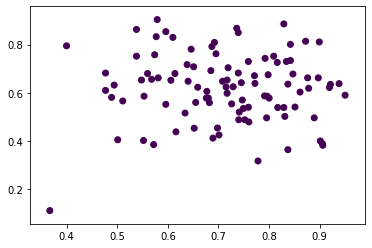

In [12]:
plt.scatter(df['danceability'],df['energy'],c=df['success']);

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression()

In [15]:
clf.fit(X,y)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0


In [5]:
# Let's get another dataframe with the audio features of 100 random songs

df2 = pd.read_csv('100_random_tracks_with_audio_features.csv')
df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,track_id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.707,0.238,3,-8.818,1,0.0379,0.0905,0.000002,0.0842,0.3450,124.156,audio_features,1boXOL0ua7N2iCOUVI1p9F,spotify:track:1boXOL0ua7N2iCOUVI1p9F,https://api.spotify.com/v1/tracks/1boXOL0ua7N2...,https://api.spotify.com/v1/audio-analysis/1boX...,270847,3
1,0.732,0.553,7,-7.406,1,0.0990,0.0820,0.000008,0.1410,0.2910,125.311,audio_features,4qzk9R04fB1EdGiaovnKEH,spotify:track:4qzk9R04fB1EdGiaovnKEH,https://api.spotify.com/v1/tracks/4qzk9R04fB1E...,https://api.spotify.com/v1/audio-analysis/4qzk...,197307,5
2,0.735,0.655,9,-4.374,1,0.2360,0.1230,0.000000,0.1060,0.6190,160.055,audio_features,0MvqSYPr5Wi62JB7VWvqwz,spotify:track:0MvqSYPr5Wi62JB7VWvqwz,https://api.spotify.com/v1/tracks/0MvqSYPr5Wi6...,https://api.spotify.com/v1/audio-analysis/0Mvq...,181867,4
3,0.640,0.600,7,-6.341,1,0.0948,0.0750,0.000079,0.0752,0.6270,175.832,audio_features,2kIZPLtqtmDh3dX6HuAfD0,spotify:track:2kIZPLtqtmDh3dX6HuAfD0,https://api.spotify.com/v1/tracks/2kIZPLtqtmDh...,https://api.spotify.com/v1/audio-analysis/2kIZ...,297800,4
4,0.883,0.546,8,-3.793,1,0.1420,0.0107,0.001500,0.0730,0.9160,143.998,audio_features,23LAuKGYTIW6rrCiZqvDZG,spotify:track:23LAuKGYTIW6rrCiZqvDZG,https://api.spotify.com/v1/tracks/23LAuKGYTIW6...,https://api.spotify.com/v1/audio-analysis/23LA...,185318,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.169,0.222,7,-15.954,0,0.0356,0.5280,0.964000,0.1070,0.0397,110.877,audio_features,64q5EfFKR9hYJ1FHqSClxe,spotify:track:64q5EfFKR9hYJ1FHqSClxe,https://api.spotify.com/v1/tracks/64q5EfFKR9hY...,https://api.spotify.com/v1/audio-analysis/64q5...,247400,4
96,0.752,0.775,9,-7.289,1,0.0546,0.0324,0.000000,0.3510,0.5950,122.014,audio_features,4MflGTO2ZTcSQ12bWcyRgI,spotify:track:4MflGTO2ZTcSQ12bWcyRgI,https://api.spotify.com/v1/tracks/4MflGTO2ZTcS...,https://api.spotify.com/v1/audio-analysis/4Mfl...,199263,4
97,0.924,0.766,10,-4.092,0,0.2560,0.0510,0.000000,0.0981,0.4550,132.060,audio_features,1tXCF7TwDnuHRgwQ63FeM5,spotify:track:1tXCF7TwDnuHRgwQ63FeM5,https://api.spotify.com/v1/tracks/1tXCF7TwDnuH...,https://api.spotify.com/v1/audio-analysis/1tXC...,191713,4
98,0.799,0.690,11,-7.854,0,0.1650,0.0205,0.000003,0.4320,0.6110,105.935,audio_features,7IX8SlSUzJXXhrI3KQedJ4,spotify:track:7IX8SlSUzJXXhrI3KQedJ4,https://api.spotify.com/v1/tracks/7IX8SlSUzJXX...,https://api.spotify.com/v1/audio-analysis/7IX8...,200209,4


In [6]:
df2.shape

(100, 18)

In [9]:
# Let's add a column stating that all these tracks are successfull, 'success'=0.0
df2['success']=np.zeros(100)
df2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,track_id,uri,track_href,analysis_url,duration_ms,time_signature,success
0,0.707,0.238,3,-8.818,1,0.0379,0.0905,0.000002,0.0842,0.3450,124.156,audio_features,1boXOL0ua7N2iCOUVI1p9F,spotify:track:1boXOL0ua7N2iCOUVI1p9F,https://api.spotify.com/v1/tracks/1boXOL0ua7N2...,https://api.spotify.com/v1/audio-analysis/1boX...,270847,3,0.0
1,0.732,0.553,7,-7.406,1,0.0990,0.0820,0.000008,0.1410,0.2910,125.311,audio_features,4qzk9R04fB1EdGiaovnKEH,spotify:track:4qzk9R04fB1EdGiaovnKEH,https://api.spotify.com/v1/tracks/4qzk9R04fB1E...,https://api.spotify.com/v1/audio-analysis/4qzk...,197307,5,0.0
2,0.735,0.655,9,-4.374,1,0.2360,0.1230,0.000000,0.1060,0.6190,160.055,audio_features,0MvqSYPr5Wi62JB7VWvqwz,spotify:track:0MvqSYPr5Wi62JB7VWvqwz,https://api.spotify.com/v1/tracks/0MvqSYPr5Wi6...,https://api.spotify.com/v1/audio-analysis/0Mvq...,181867,4,0.0
3,0.640,0.600,7,-6.341,1,0.0948,0.0750,0.000079,0.0752,0.6270,175.832,audio_features,2kIZPLtqtmDh3dX6HuAfD0,spotify:track:2kIZPLtqtmDh3dX6HuAfD0,https://api.spotify.com/v1/tracks/2kIZPLtqtmDh...,https://api.spotify.com/v1/audio-analysis/2kIZ...,297800,4,0.0
4,0.883,0.546,8,-3.793,1,0.1420,0.0107,0.001500,0.0730,0.9160,143.998,audio_features,23LAuKGYTIW6rrCiZqvDZG,spotify:track:23LAuKGYTIW6rrCiZqvDZG,https://api.spotify.com/v1/tracks/23LAuKGYTIW6...,https://api.spotify.com/v1/audio-analysis/23LA...,185318,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.169,0.222,7,-15.954,0,0.0356,0.5280,0.964000,0.1070,0.0397,110.877,audio_features,64q5EfFKR9hYJ1FHqSClxe,spotify:track:64q5EfFKR9hYJ1FHqSClxe,https://api.spotify.com/v1/tracks/64q5EfFKR9hY...,https://api.spotify.com/v1/audio-analysis/64q5...,247400,4,0.0
96,0.752,0.775,9,-7.289,1,0.0546,0.0324,0.000000,0.3510,0.5950,122.014,audio_features,4MflGTO2ZTcSQ12bWcyRgI,spotify:track:4MflGTO2ZTcSQ12bWcyRgI,https://api.spotify.com/v1/tracks/4MflGTO2ZTcS...,https://api.spotify.com/v1/audio-analysis/4Mfl...,199263,4,0.0
97,0.924,0.766,10,-4.092,0,0.2560,0.0510,0.000000,0.0981,0.4550,132.060,audio_features,1tXCF7TwDnuHRgwQ63FeM5,spotify:track:1tXCF7TwDnuHRgwQ63FeM5,https://api.spotify.com/v1/tracks/1tXCF7TwDnuH...,https://api.spotify.com/v1/audio-analysis/1tXC...,191713,4,0.0
98,0.799,0.690,11,-7.854,0,0.1650,0.0205,0.000003,0.4320,0.6110,105.935,audio_features,7IX8SlSUzJXXhrI3KQedJ4,spotify:track:7IX8SlSUzJXXhrI3KQedJ4,https://api.spotify.com/v1/tracks/7IX8SlSUzJXX...,https://api.spotify.com/v1/audio-analysis/7IX8...,200209,4,0.0


In [10]:
# Now we'll concatenate both dataframes

result = pd.concat([df, df2], ignore_index=True, sort=False)

In [13]:
result

,rank,artist,title,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,success
0,1.0,Lil Nas X Featuring Billy Ray Cyrus,Old Town Road,2YpeDb67231RjR0MgVLzsG,0.878,0.6190,6,-5.560,1,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,audio_features,spotify:track:2YpeDb67231RjR0MgVLzsG,https://api.spotify.com/v1/tracks/2YpeDb67231R...,https://api.spotify.com/v1/audio-analysis/2Ype...,157067,4,1.0
1,2.0,Post Malone & Swae Lee,Sunflower (Spider-Man: Into The Spider-Verse),3KkXRkHbMCARz0aVfEt68P,0.760,0.4790,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.9130,89.911,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4,1.0
2,3.0,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,0.752,0.4880,6,-7.050,1,0.0705,0.297000,0.000009,0.0936,0.5330,136.041,audio_features,spotify:track:5p7ujcrUXASCNwRaWNHR1C,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,https://api.spotify.com/v1/audio-analysis/5p7u...,201661,4,1.0
3,4.0,Billie Eilish,Bad Guy,2Fxmhks0bxGSBdJ92vM42m,0.701,0.4250,7,-10.965,1,0.3750,0.328000,0.130000,0.1000,0.5620,135.128,audio_features,spotify:track:2Fxmhks0bxGSBdJ92vM42m,https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...,https://api.spotify.com/v1/audio-analysis/2Fxm...,194088,4,1.0
4,5.0,Post Malone,Wow.,7xQAfvXzm3AkraOtGPWIZg,0.829,0.5390,11,-7.359,0,0.2080,0.136000,0.000002,0.1030,0.3880,99.960,audio_features,spotify:track:7xQAfvXzm3AkraOtGPWIZg,https://api.spotify.com/v1/tracks/7xQAfvXzm3Ak...,https://api.spotify.com/v1/audio-analysis/7xQA...,149547,4,1.0
5,6.0,Marshmello & Bastille,Happier,2dpaYNEQHiRxtZbfNsse99,0.687,0.7920,5,-2.749,1,0.0452,0.191000,0.000000,0.1670,0.6710,100.015,audio_features,spotify:track:2dpaYNEQHiRxtZbfNsse99,https://api.spotify.com/v1/tracks/2dpaYNEQHiRx...,https://api.spotify.com/v1/audio-analysis/2dpa...,214290,4,1.0
6,7.0,Ariana Grande,7 Rings,6ocbgoVGwYJhOv1GgI9NsF,0.778,0.3170,1,-10.732,0,0.3340,0.592000,0.000000,0.0881,0.3270,140.048,audio_features,spotify:track:6ocbgoVGwYJhOv1GgI9NsF,https://api.spotify.com/v1/tracks/6ocbgoVGwYJh...,https://api.spotify.com/v1/audio-analysis/6ocb...,178627,4,1.0
7,8.0,Khalid,Talk,6TqXcAFInzjp0bODyvrWEq,0.901,0.4000,0,-8.575,1,0.1260,0.051000,0.000000,0.0599,0.3460,135.984,audio_features,spotify:track:6TqXcAFInzjp0bODyvrWEq,https://api.spotify.com/v1/tracks/6TqXcAFInzjp...,https://api.spotify.com/v1/audio-analysis/6TqX...,197573,4,1.0
8,9.0,Travis Scott,Sicko Mode,2xLMifQCjDGFmkHkpNLD9h,0.834,0.7300,8,-3.714,1,0.2220,0.005130,0.000000,0.1240,0.4460,155.008,audio_features,spotify:track:2xLMifQCjDGFmkHkpNLD9h,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,https://api.spotify.com/v1/audio-analysis/2xLM...,312820,4,1.0
9,10.0,Jonas Brothers,Sucker,22vgEDb5hykfaTwLuskFGD,0.842,0.7340,1,-5.065,0,0.0588,0.042700,0.000000,0.1060,0.9520,137.958,audio_features,spotify:track:22vgEDb5hykfaTwLuskFGD,https://api.spotify.com/v1/tracks/22vgEDb5hykf...,https://api.spotify.com/v1/audio-analysis/22vg...,181027,4,1.0
